In [1]:
import numpy as np
import matplotlib.pyplot as plt
import qutip as qt

import sim_utils as su
KHz = su.KHz

In [2]:
cq = su.CQ(nqubits=1)

cq.add_rabi_oscillation(0)

dt = 0.001 / KHz
t = np.arange(0., 30./KHz, dt)

result = qt.mesolve(cq.H, cq.cat_states()[0], t,
                    c_ops=cq.loss_terms(),
                    e_ops=[psi * psi.dag() for psi in cq.cat_states()],
                    options=qt.Options(store_states=False, store_final_state=True))

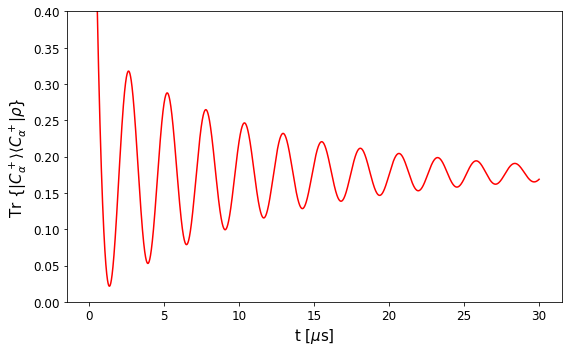

In [3]:
plt.figure(figsize=(8, 5))
plt.plot(t * KHz, result.expect[0], color="red")

plt.xlabel("t [$\mu$s]", fontsize=15)
plt.ylabel("Tr {$|C_\\alpha^+ \\rangle \langle C_\\alpha^+ | \\rho$}", fontsize=15)
plt.tick_params(axis='x', labelsize=12)
plt.tick_params(axis='y', labelsize=12)
#plt.xlim(0., 2)

plt.ylim(0,0.4)
plt.tight_layout()
plt.savefig("rabi_1.jpg")

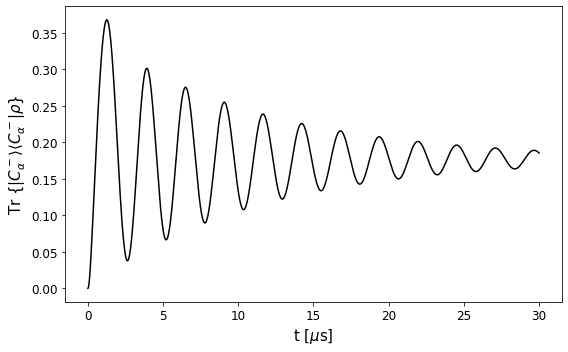

In [4]:
plt.figure(figsize=(8, 5))
plt.plot(t * KHz, result.expect[1], color="black")

plt.xlabel("t [$\mu$s]", fontsize=15)
plt.ylabel("Tr {$|C_\\alpha^- \\rangle \langle C_\\alpha^- | \\rho$}", fontsize=15)
plt.tick_params(axis='x', labelsize=12)
plt.tick_params(axis='y', labelsize=12)
#plt.xlim(0., 2)
#plt.ylim(0,0.4)
plt.tight_layout()
plt.savefig("rabi_2.jpg")